In [1]:
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://query.data.world/s/2ccihhogym3uppbj6maopkvqdlca3b')


novo = df.loc[((df['Country'] == 'Brazil') | (df['Country'] == 'United States')) & (df['dt'] > '2000-01-01')]


m = folium.Map([-13.6563295, -69.7301043], zoom_start=2, tiles='Stamen Toner')
m

latList = []
lngList = []
idxList = []
for index, row in novo.iterrows():
    sLat = ''
    sLon = ''
    fLat = 0.0
    fLon = 0.0
    sLat = str(row['Latitude']).replace('E', '').replace('S', '').replace('W', '').replace('N', '')
    sLon = str(row['Longitude']).replace('E', '').replace('S', '').replace('W', '').replace('N', '')
    if 'S' in row['Latitude'] or 'E' in row['Latitude']:
        fLat = float(sLat) * -1
    else:
        fLat = float(sLat)
    if 'S' in row['Longitude'] or 'E' in row['Longitude'] or 'W' in row['Longitude']:
        fLon = float(sLon) * -1
    else:
        fLon = float(sLon)
        
    latList.append(fLat)
    lngList.append(fLon)
    idxList.append('dt')
    color = "#3db7e4"
    if float(row['AverageTemperature']) > 20.0:
        color = "#FE5F55"
    elif float(row['AverageTemperature']) < 15.0:
        color = "#9DD1F1"
    folium.CircleMarker([fLat, fLon],
                        radius=15,
                        
                        popup=row['City'],
                        fill_color=color, # divvy color
                       ).add_to(m)
newDf = pd.DataFrame({
    'Latitude': latList,
    'Longitude': lngList
    }, index=idxList)
stationArr = newDf[['Latitude', 'Longitude']].values

m.add_child(plugins.HeatMap(stationArr, radius=15, ))



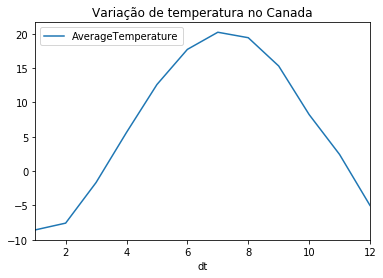

In [2]:



new = df[['Country', 'AverageTemperature', 'dt']].copy()

meuPais = 'Canada'

filtro = new.loc[((df['Country'] == meuPais) ) & (new['dt'] > '2000-01-01')]
novo = filtro.groupby(pd.to_datetime(filtro['dt']).dt.month).mean()
novo.head()
novo.plot(kind='line', title='Variação de temperatura no ' +meuPais )